# Finding the equilibrium state of a physical system by minimizing its potential energy

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
g = 9.81  # gravity of Earth
m = .1  # mass, in kg
n = 20  # number of masses
e = .1  # initial distance between the masses
l = e  # relaxed length of the springs
k = 10000  # spring stiffness

In [3]:
P0 = np.zeros((n, 2))
P0[:, 0] = np.repeat(e * np.arange(n // 2), 2)
P0[:, 1] = np.tile((0, -e), n // 2)

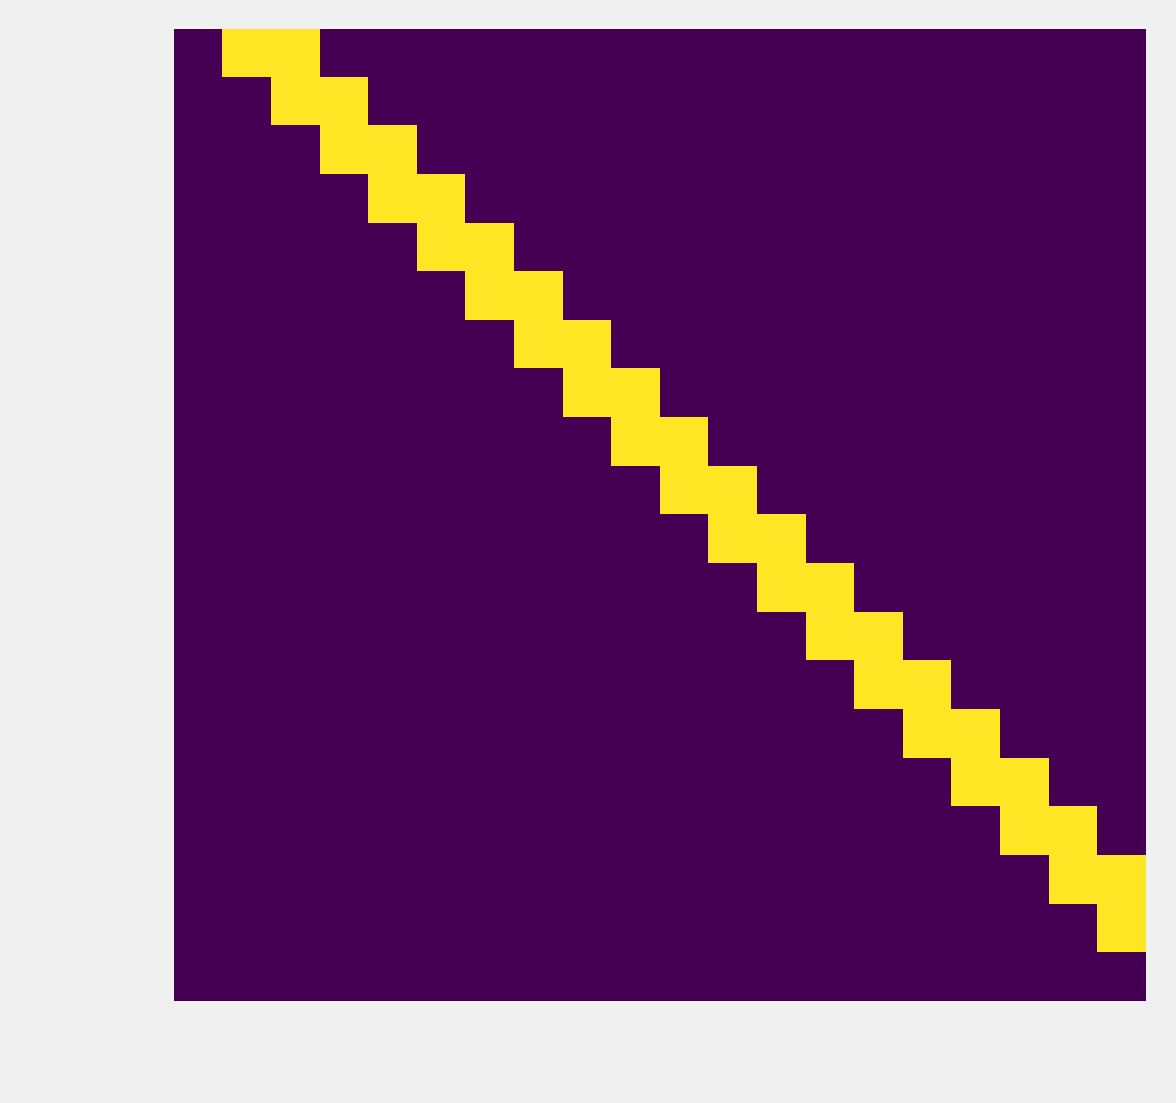

In [4]:
A = np.eye(n, n, 1) + np.eye(n, n, 2)
# We display a graphic representation of
# the matrix.
f, ax = plt.subplots(1, 1)
ax.imshow(A)
ax.set_axis_off()

In [5]:
L = l * (np.eye(n, n, 1) + np.eye(n, n, 2))
for i in range(n // 2 - 1):
    L[2 * i + 1, 2 * i + 2] *= np.sqrt(2)

In [6]:
I, J = np.nonzero(A)

In [7]:
def dist(P):
    return np.sqrt((P[:, 0] - P[:, 0][:, np.newaxis])**2 +
                   (P[:, 1] - P[:, 1][:, np.newaxis])**2)

In [8]:
def show_bar(P):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))

    # Wall.
    ax.axvline(0, color='k', lw=3)

    # Distance matrix.
    D = dist(P)

    # We plot the springs.
    for i, j in zip(I, J):
        # The color depends on the spring tension, which
        # is proportional to the spring elongation.
        c = D[i, j] - L[i, j]
        ax.plot(P[[i, j], 0], P[[i, j], 1],
                lw=2, color=plt.cm.copper(c * 150))

    # We plot the masses.
    ax.plot(P[[I, J], 0], P[[I, J], 1], 'ok',)

    # We configure the axes.
    ax.axis('equal')
    ax.set_xlim(P[:, 0].min() - e / 2,
                P[:, 0].max() + e / 2)
    ax.set_ylim(P[:, 1].min() - e / 2,
                P[:, 1].max() + e / 2)
    ax.set_axis_off()

    return ax

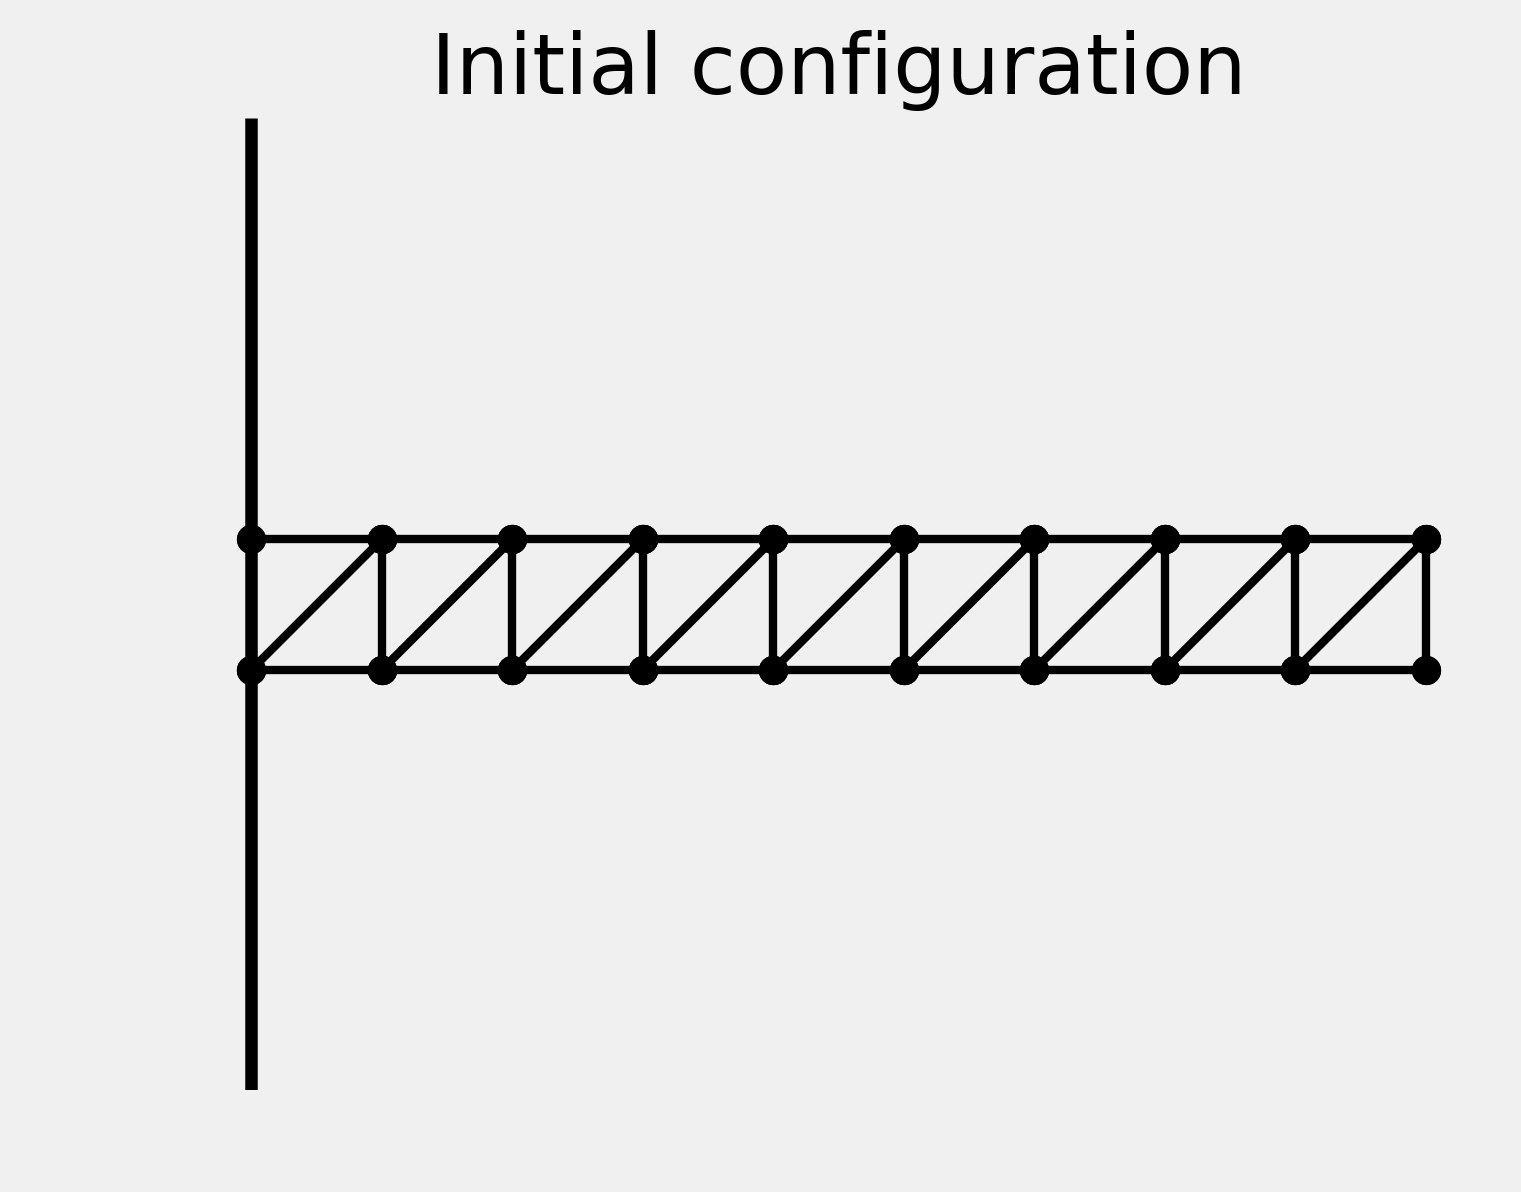

In [9]:
ax = show_bar(P0)
ax.set_title("Initial configuration")

In [10]:
def energy(P):
    # The argument P is a vector (flattened matrix).
    # We convert it to a matrix here.
    P = P.reshape((-1, 2))
    # We compute the distance matrix.
    D = dist(P)
    # The potential energy is the sum of the
    # gravitational and elastic potential energies.
    return (g * m * P[:, 1].sum() +
            .5 * (k * A * (D - L)**2).sum())

In [11]:
energy(P0.ravel())

-0.981

In [12]:
bounds = np.c_[P0[:2, :].ravel(),
               P0[:2, :].ravel()].tolist() + \
    [[None, None]] * (2 * (n - 2))

In [13]:
P1 = opt.minimize(energy, P0.ravel(),
                  method='L-BFGS-B',
                  bounds=bounds).x.reshape((-1, 2))

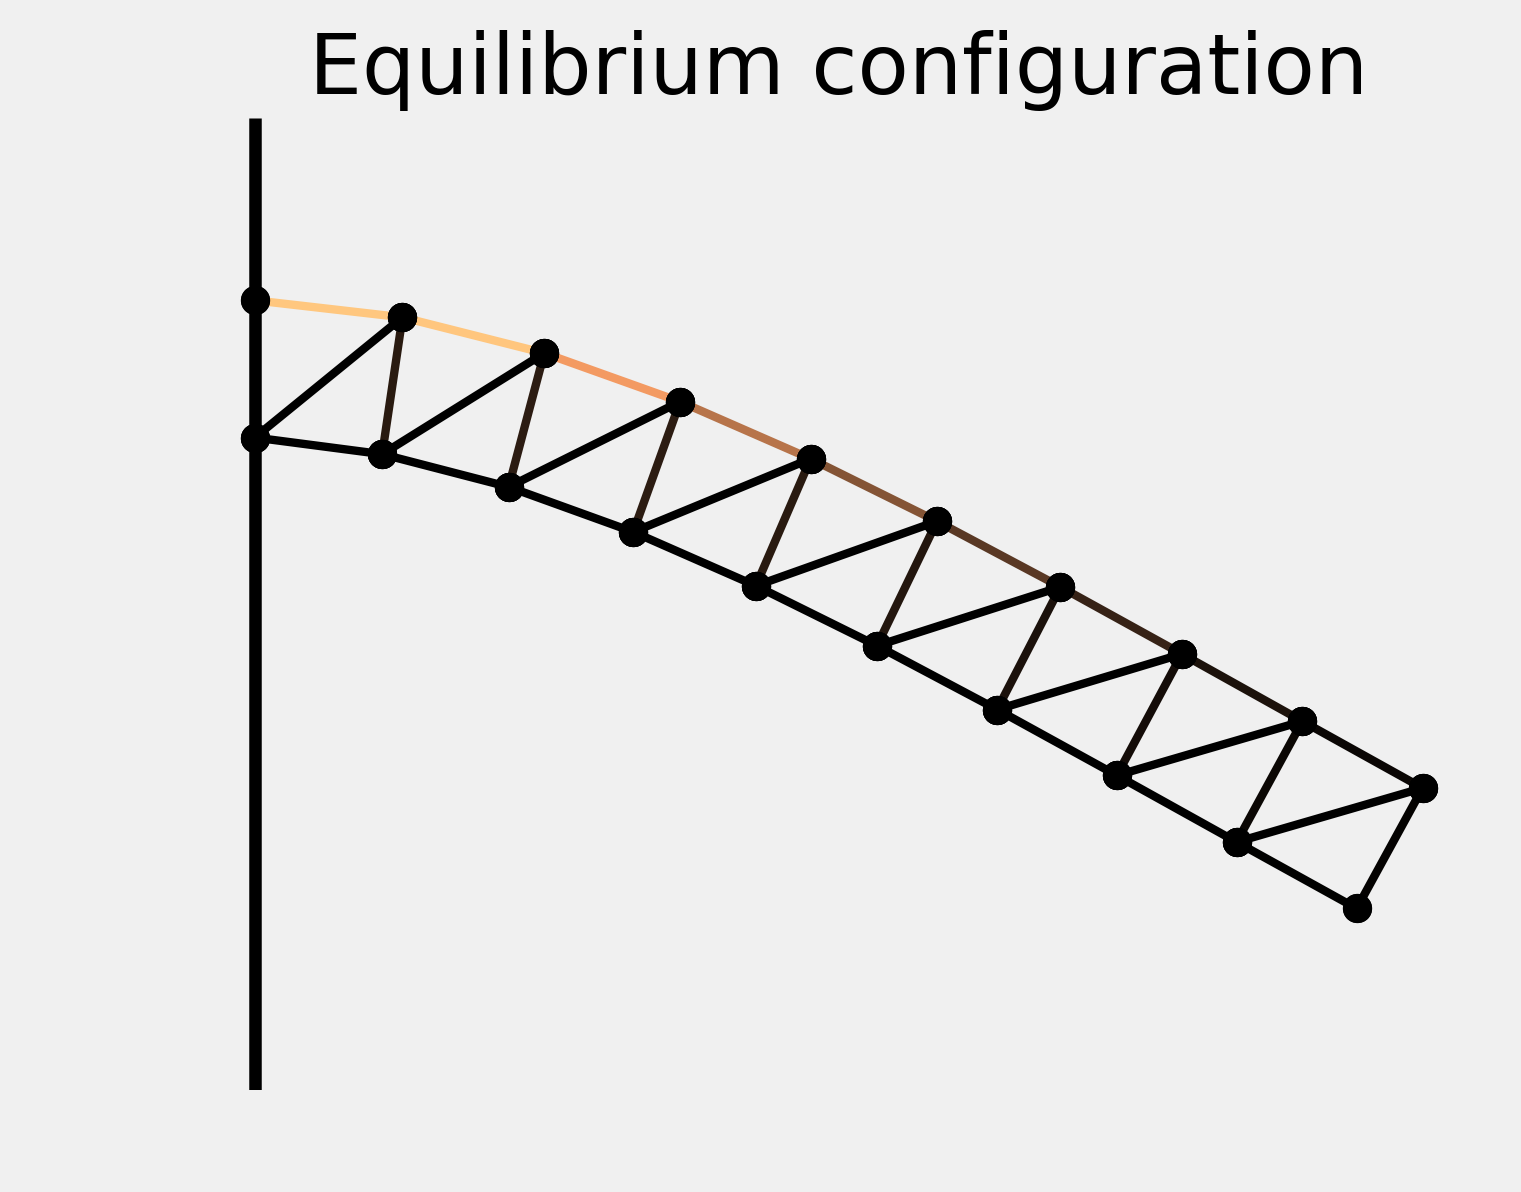

In [14]:
ax = show_bar(P1)
ax.set_title("Equilibrium configuration")